Classification Report:

              precision    recall  f1-score   support

           0       0.64      0.76      0.69        37
           1       0.44      0.30      0.36        23

    accuracy                           0.58        60
   macro avg       0.54      0.53      0.53        60
weighted avg       0.56      0.58      0.56        60



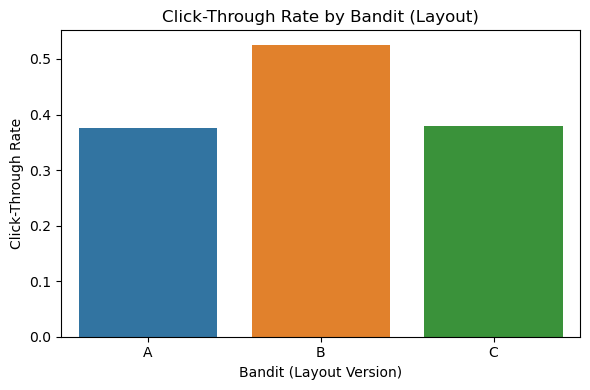

In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/Users/ripsime/Downloads/Group-6/ds/simulated_data_tables/transactions.csv")

df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour

df = pd.get_dummies(df, columns=["bandit_id"], prefix="bandit")

feature_cols = ['hour'] + [col for col in df.columns if col.startswith('bandit_')]
X = df[feature_cols]
y = df['clicked'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

ctr_data = {
    "Bandit": ["A", "B", "C"],
    "CTR": [
        df[df["bandit_1"] == 1]["clicked"].mean(),
        df[df["bandit_2"] == 1]["clicked"].mean(),
        df[df["bandit_3"] == 1]["clicked"].mean()
    ]
}
ctr_df = pd.DataFrame(ctr_data)

plt.figure(figsize=(6, 4))
sns.barplot(data=ctr_df, x="Bandit", y="CTR")
plt.title("Click-Through Rate by Bandit (Layout)")
plt.xlabel("Bandit (Layout Version)")
plt.ylabel("Click-Through Rate")
plt.tight_layout()
plt.show()
